In [1]:
#Import Required Libraries
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random
import matplotlib.pyplot as plt

In [2]:
# Define fuzzy variables
# Inputs
temperature = ctrl.Antecedent(np.arange(-3, 45, 1), 'Temperature')
light_level = ctrl.Antecedent(np.arange(0, 1001, 1), 'Light Level')
activity = ctrl.Antecedent(np.arange(0, 100, 1), 'Activity')

#Outputs
ac_temperature = ctrl.Consequent(np.arange(16, 30, 1), 'Ac Temperature')
light_intensity = ctrl.Consequent(np.arange(0, 100, 1), 'Light Intensity')
water_temperature = ctrl.Consequent(np.arange(10, 40, 1), 'Water Temperature')

In [3]:
# Membership Functions
# Temperature
temperature['Cold'] = fuzz.trapmf(temperature.universe, [-3, 10, 15, 20])
temperature['Comfortable']  = fuzz.trimf(temperature.universe, [15, 25, 35])
temperature['Hot'] = fuzz.trapmf(temperature.universe, [30, 35, 45, 45])

# Light Level
light_level['Dark'] = fuzz.trapmf(light_level.universe, [0, 0, 200, 400])
light_level['Normal'] = fuzz.trimf(light_level.universe, [200, 500, 800])
light_level['Bright'] = fuzz.trapmf(light_level.universe, [600, 800, 1000, 1000])

# Activity
activity['Low'] = fuzz.trapmf(activity.universe, [0, 0, 20, 40])
activity['Moderate'] = fuzz.trimf(activity.universe, [20, 50, 80])
activity['High'] = fuzz.trapmf(activity.universe, [60, 80, 99, 99])

# Ac Temperature
ac_temperature['Low'] = fuzz.trapmf(ac_temperature.universe, [16, 18, 20, 20])
ac_temperature['Medium'] = fuzz.trimf(ac_temperature.universe, [18, 23, 28])
ac_temperature['High'] = fuzz.trapmf(ac_temperature.universe, [25, 27, 30, 30])

# Light Intensity
light_intensity['Dim'] = fuzz.trimf(light_intensity.universe, [0, 25, 50])
light_intensity['Normal'] = fuzz.trimf(light_intensity.universe, [25, 50, 75])
light_intensity['Bright'] = fuzz.trimf(light_intensity.universe, [50, 75, 99])

# Water Temperature
water_temperature['Low'] = fuzz.trapmf(water_temperature.universe, [10, 15, 18, 18])
water_temperature['Medium'] = fuzz.trimf(water_temperature.universe, [18, 20, 28])
water_temperature['High'] = fuzz.trapmf(water_temperature.universe, [25, 30, 35, 40])

c:\Users\LEGION\AppData\Local\Programs\Python\Python313\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


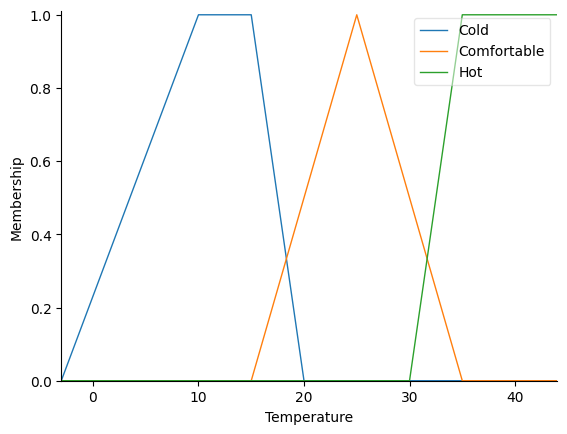

In [4]:
# Plot Membership Functions

# Temperature
temperature.view()

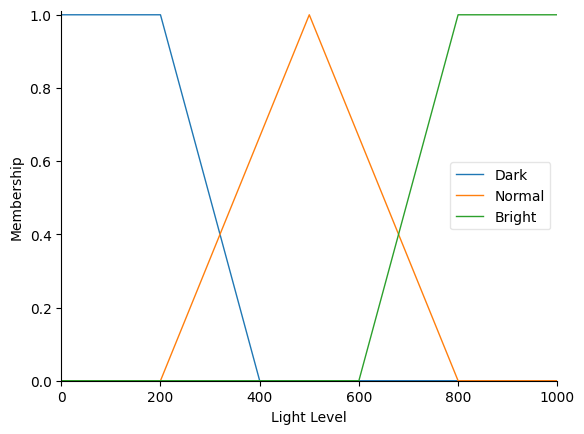

In [5]:
# Light Level
light_level.view()

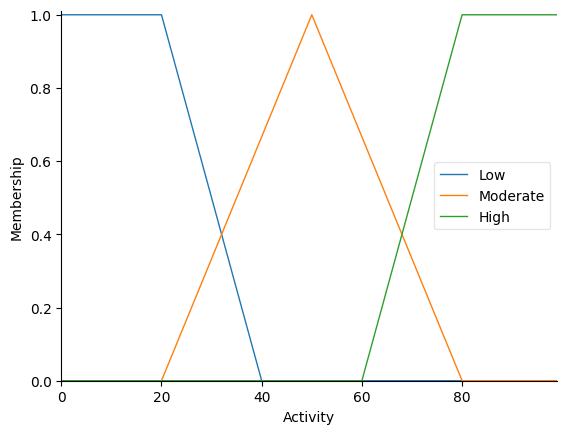

In [6]:
# Activity
activity.view()

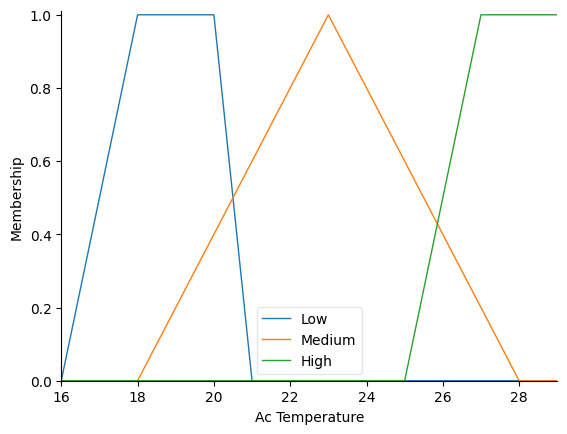

In [7]:
# Ac Temperature
ac_temperature.view()

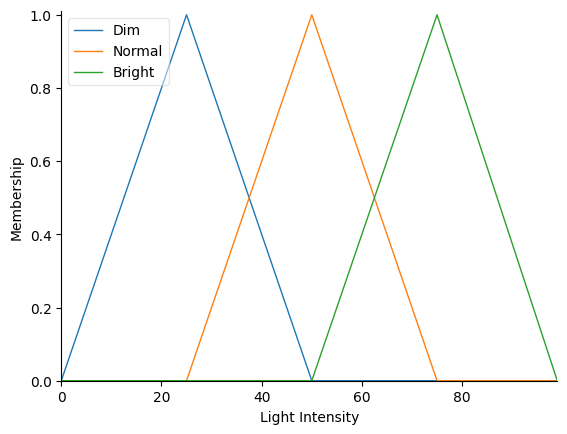

In [8]:
# Light Intensity
light_intensity.view()

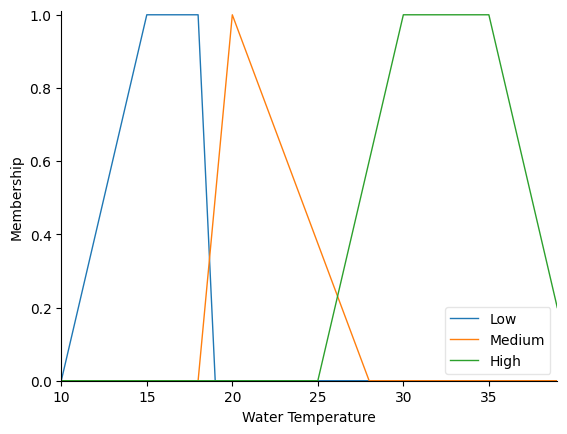

In [9]:
# Water Temperature
water_temperature.view()

In [10]:
# Define Rules
# Define Rules for Ac Temperature
ac_temperature_rule1 = ctrl.Rule(temperature['Hot'] & activity['High'], ac_temperature['Low'])
ac_temperature_rule2 = ctrl.Rule(temperature['Hot'] & activity['Moderate'], ac_temperature['Low'])
ac_temperature_rule3 = ctrl.Rule(temperature['Hot'] & activity['Low'], ac_temperature['Medium'])
ac_temperature_rule4 = ctrl.Rule(temperature['Comfortable'] & activity['High'], ac_temperature['Low'])
ac_temperature_rule5 = ctrl.Rule(temperature['Comfortable'] & activity['Moderate'], ac_temperature['Medium'])
ac_temperature_rule6 = ctrl.Rule(temperature['Comfortable'] & activity['Low'], ac_temperature['Medium'])
ac_temperature_rule7 = ctrl.Rule(temperature['Cold'] & activity['High'], ac_temperature['Medium'])
ac_temperature_rule8 = ctrl.Rule(temperature['Cold'] & activity['Moderate'], ac_temperature['Medium'])
ac_temperature_rule9 = ctrl.Rule(temperature['Cold'] & activity['Low'], ac_temperature['High'])

In [11]:
# Define Rules for Light Intensity
light_intensity_rule1 = ctrl.Rule(light_level['Bright'] & activity['High'], light_intensity['Dim'])
light_intensity_rule2 = ctrl.Rule(light_level['Bright'] & activity['Moderate'], light_intensity['Dim'])
light_intensity_rule3 = ctrl.Rule(light_level['Bright'] & activity['Low'], light_intensity['Dim'])
light_intensity_rule4 = ctrl.Rule(light_level['Normal'] & activity['High'], light_intensity['Normal'])
light_intensity_rule5 = ctrl.Rule(light_level['Normal'] & activity['Moderate'], light_intensity['Normal'])
light_intensity_rule6 = ctrl.Rule(light_level['Normal'] & activity['Low'], light_intensity['Dim'])
light_intensity_rule7 = ctrl.Rule(light_level['Dark'] & activity['High'], light_intensity['Bright'])
light_intensity_rule8 = ctrl.Rule(light_level['Dark'] & activity['Moderate'], light_intensity['Bright'])
light_intensity_rule9 = ctrl.Rule(light_level['Dark'] & activity['Low'], light_intensity['Dim'])

In [12]:
# Define Rules for Water Temperature
water_temperature_rule1 = ctrl.Rule(temperature['Hot'] & activity['High'], water_temperature['Low'])
water_temperature_rule2 = ctrl.Rule(temperature['Hot'] & activity['Moderate'], water_temperature['Low'])
water_temperature_rule3 = ctrl.Rule(temperature['Hot'] & activity['Low'], water_temperature['Medium'])
water_temperature_rule4 = ctrl.Rule(temperature['Comfortable'] & activity['High'], water_temperature['Low'])
water_temperature_rule5 = ctrl.Rule(temperature['Comfortable'] & activity['Moderate'], water_temperature['Medium'])
water_temperature_rule6 = ctrl.Rule(temperature['Comfortable'] & activity['Low'], water_temperature['Medium'])
water_temperature_rule7 = ctrl.Rule(temperature['Cold'] & activity['High'], water_temperature['Medium'])
water_temperature_rule8 = ctrl.Rule(temperature['Cold'] & activity['Moderate'], water_temperature['Medium'])
water_temperature_rule9 = ctrl.Rule(temperature['Cold'] & activity['Low'], water_temperature['High'])

In [13]:
# Create a Control System
# Control System for AC
ac_control = ctrl.ControlSystem([ac_temperature_rule1, ac_temperature_rule2, ac_temperature_rule3, ac_temperature_rule4, ac_temperature_rule5, ac_temperature_rule6, ac_temperature_rule7, ac_temperature_rule8, ac_temperature_rule9])
ac_simulation = ctrl.ControlSystemSimulation(ac_control)

In [14]:
# Control System for Light
light_control = ctrl.ControlSystem([light_intensity_rule1, light_intensity_rule2, light_intensity_rule3, light_intensity_rule4, light_intensity_rule5, light_intensity_rule6, light_intensity_rule7, light_intensity_rule8, light_intensity_rule9])
light_simulation = ctrl.ControlSystemSimulation(light_control)

In [15]:
# Control System for Water Temperature
water_control = ctrl.ControlSystem([water_temperature_rule1, water_temperature_rule2, water_temperature_rule3, water_temperature_rule4, water_temperature_rule5, water_temperature_rule6, water_temperature_rule7, water_temperature_rule8, water_temperature_rule9])
water_simulation = ctrl.ControlSystemSimulation(water_control)

In [16]:
def compute_output(temperature, activity, light_level):
    # Assign Inputs
    ac_simulation.input['Temperature'] = temperature
    ac_simulation.input['Activity'] = activity
    water_simulation.input['Temperature'] = temperature
    water_simulation.input['Activity'] = activity
    light_simulation.input['Light Level'] = light_level
    light_simulation.input['Activity'] = activity

    # Compute Output
    ac_simulation.compute()
    water_simulation.compute()
    light_simulation.compute()

    # Print Outputs
    print(f"Ac Temperature: {ac_simulation.output['Ac Temperature']:.2f}")
    print(f"Water Temperature: {water_simulation.output['Water Temperature']:.2f}")
    print(f"Light Intensity: {light_simulation.output['Light Intensity']:.2f}")

    # Plot Outputs
    ac_temperature.view(sim = ac_simulation)
    water_temperature.view(sim = water_simulation)
    light_intensity.view(sim = light_simulation)
    

    return {"ac_temperature":ac_simulation.output['Ac Temperature'], "water_temperature":water_simulation.output["Water Temperature"], "light_intensity":light_simulation.output["Light Intensity"]}

Ac Temperature: 18.71
Water Temperature: 15.33
Light Intensity: 25.00


{'ac_temperature': np.float64(18.714285714285715),
 'water_temperature': np.float64(15.333333333333336),
 'light_intensity': np.float64(24.999999999999996)}

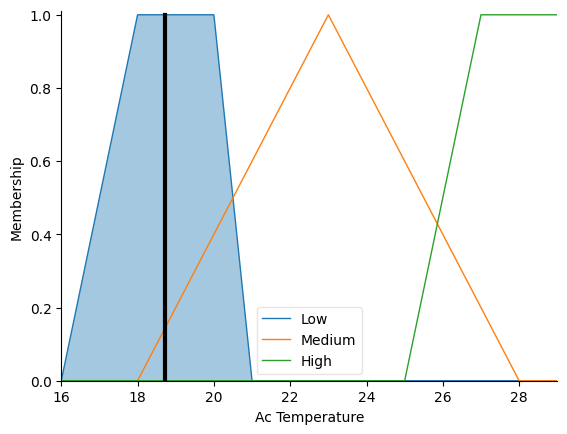

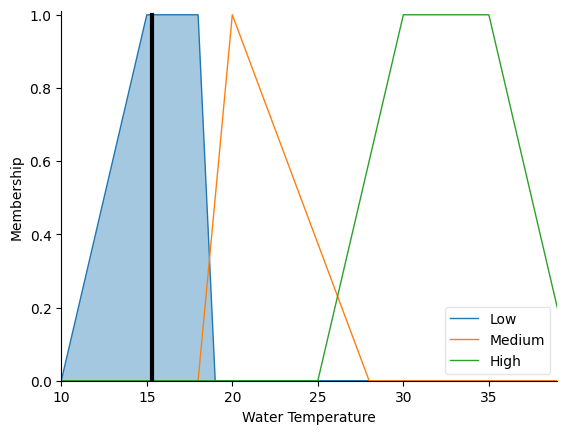

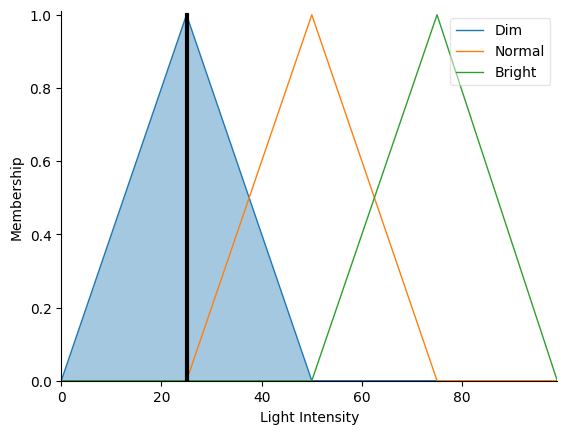

In [17]:
# Simulate Output
# Scenario 1: Hot Temperature, High Activity, Bright Light
# Expectation: AC Temperature - Low, Water Temperature - Low, Light Intensity - Dim
compute_output(temperature=35, activity=90, light_level=900)


Ac Temperature: 18.71
Water Temperature: 15.33
Light Intensity: 25.00


{'ac_temperature': np.float64(18.714285714285715),
 'water_temperature': np.float64(15.333333333333336),
 'light_intensity': np.float64(24.999999999999996)}

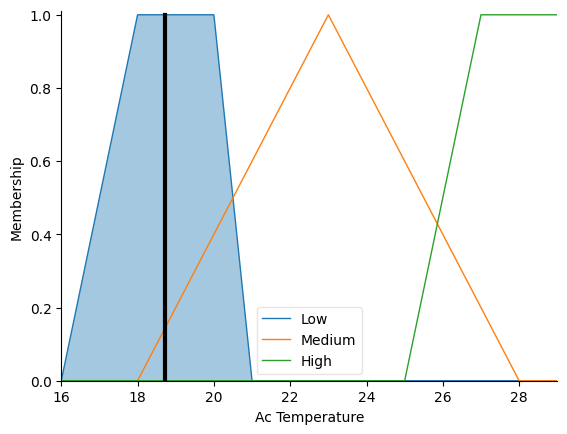

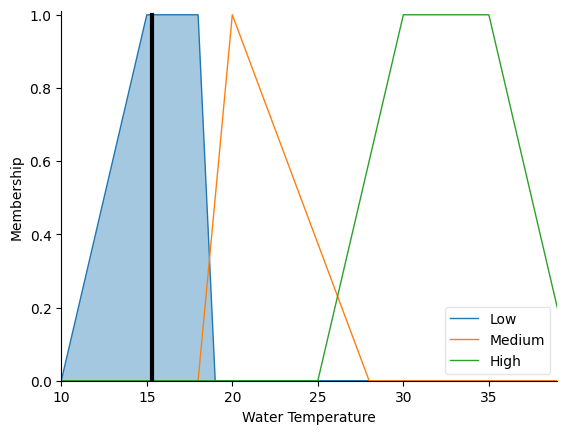

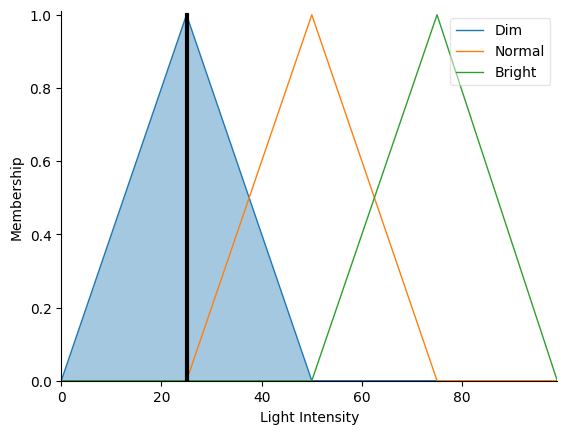

In [18]:
# Scenario 2: Hot Temperature, Moderate Activity, Bright Light
# Expectation: AC Temperature - Low, Water Temperature - Low, Light Intensity - Dim
compute_output(temperature=35, activity=50, light_level=900)

Ac Temperature: 23.00
Water Temperature: 22.00
Light Intensity: 25.00


{'ac_temperature': np.float64(23.000000000000004),
 'water_temperature': np.float64(21.999999999999993),
 'light_intensity': np.float64(24.999999999999996)}

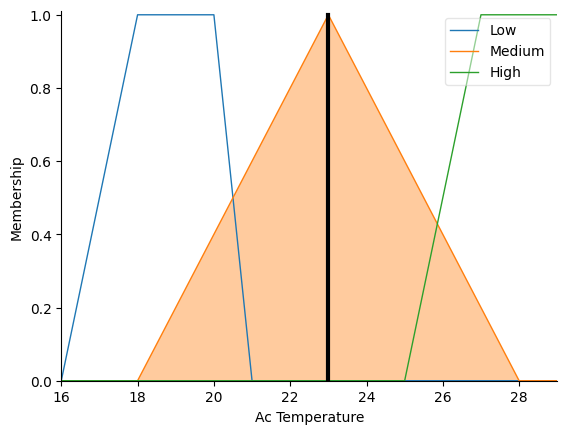

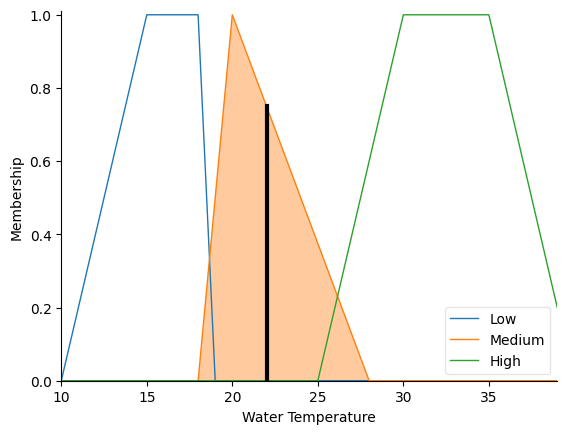

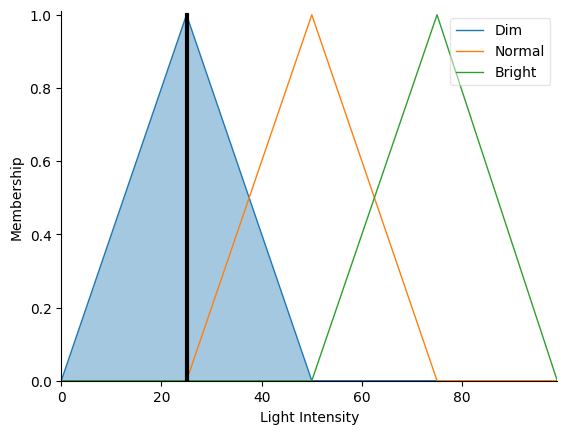

In [19]:
# Scenario 3: Hot Temperature, Low Activity, Bright Light
# Expectation: AC Temperature - Medium, Water Temperature - Medium, Light Intensity - Dim
compute_output(temperature=35, activity=10, light_level=900)

Ac Temperature: 18.71
Water Temperature: 15.33
Light Intensity: 50.00


{'ac_temperature': np.float64(18.714285714285715),
 'water_temperature': np.float64(15.333333333333336),
 'light_intensity': np.float64(50.0)}

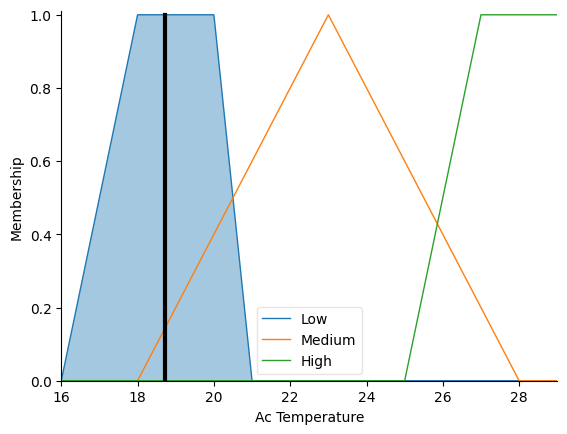

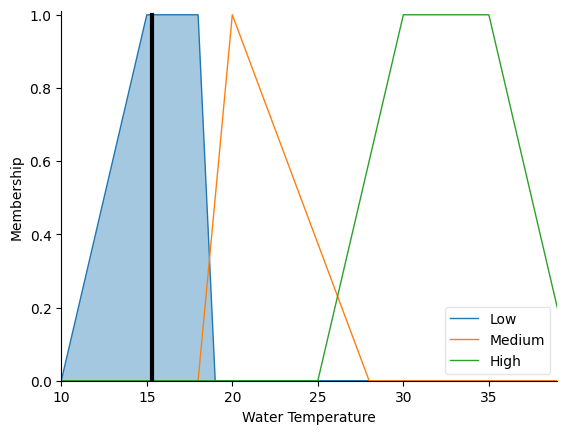

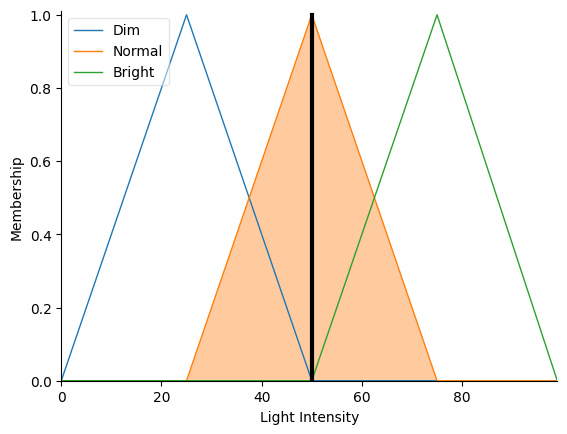

In [20]:

# Scenario 4: Comfortable Temperature, High Activity, Normal Light
# Expectation: AC Temperature - Low, Water Temperature - Low, Light Intensity - Normal
compute_output(temperature=25, activity=90, light_level=500)

Ac Temperature: 23.00
Water Temperature: 22.00
Light Intensity: 50.00


{'ac_temperature': np.float64(23.000000000000004),
 'water_temperature': np.float64(21.999999999999993),
 'light_intensity': np.float64(50.0)}

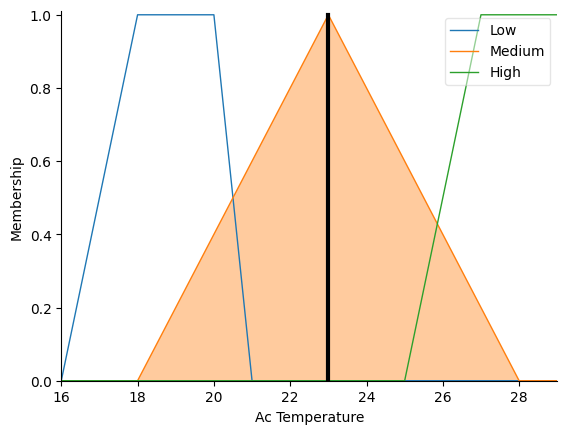

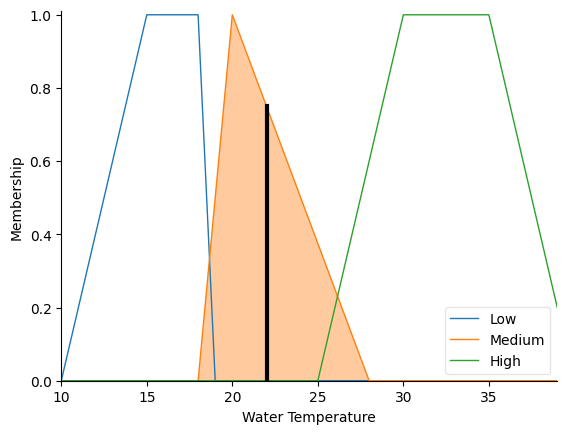

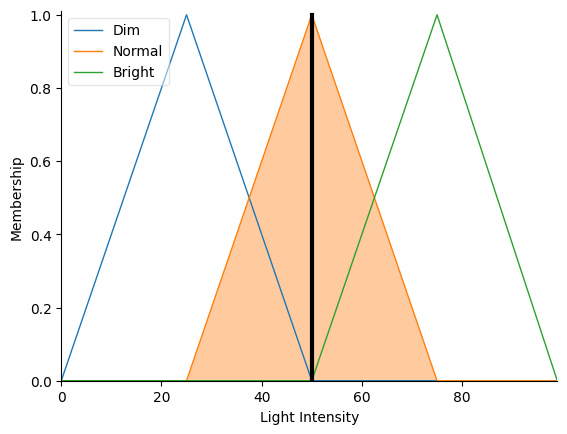

In [21]:

# Scenario 5: Comfortable Temperature, Moderate Activity, Normal Light
# Expectation: AC Temperature - Medium, Water Temperature - Medium, Light Intensity - Normal
compute_output(temperature=25, activity=50, light_level=500)

Ac Temperature: 23.00
Water Temperature: 22.00
Light Intensity: 25.00


{'ac_temperature': np.float64(23.000000000000004),
 'water_temperature': np.float64(21.999999999999993),
 'light_intensity': np.float64(24.999999999999996)}

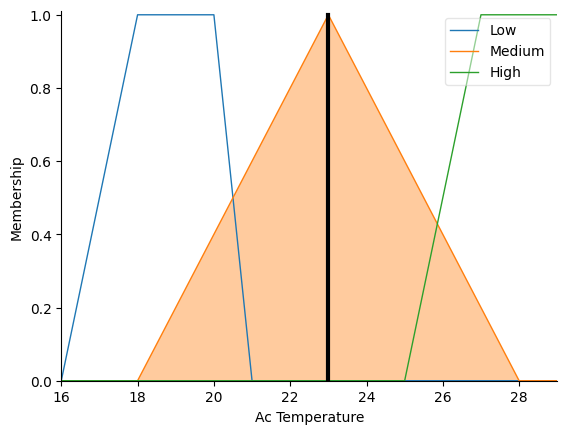

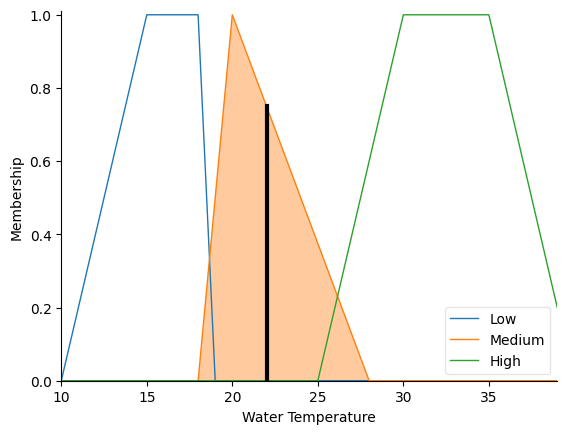

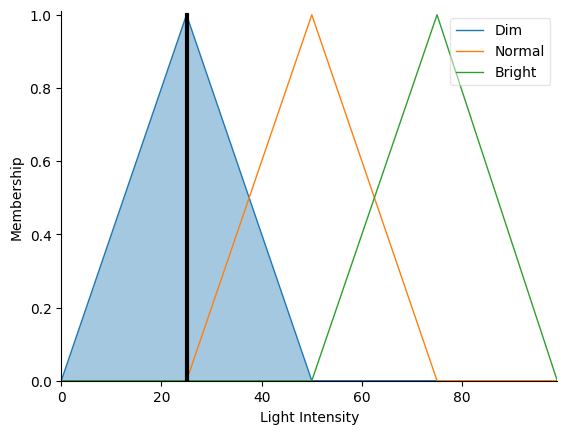

In [22]:

# Scenario 6: Comfortable Temperature, Low Activity, Normal Light
# Expectation: AC Temperature - Medium, Water Temperature - Medium, Light Intensity - Dim
compute_output(temperature=25, activity=10, light_level=500)

Ac Temperature: 23.00
Water Temperature: 22.21
Light Intensity: 74.67


{'ac_temperature': np.float64(23.0),
 'water_temperature': np.float64(22.213675213675206),
 'light_intensity': np.float64(74.66666666666666)}

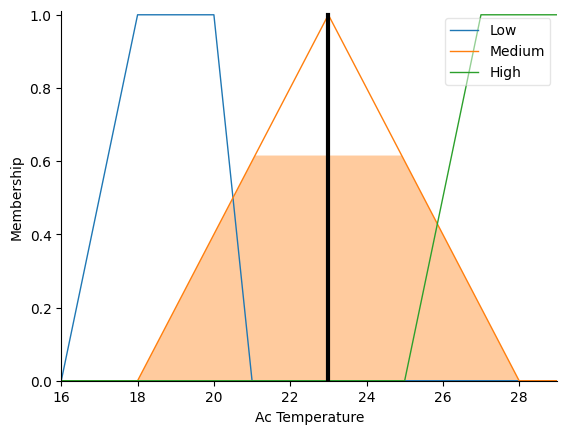

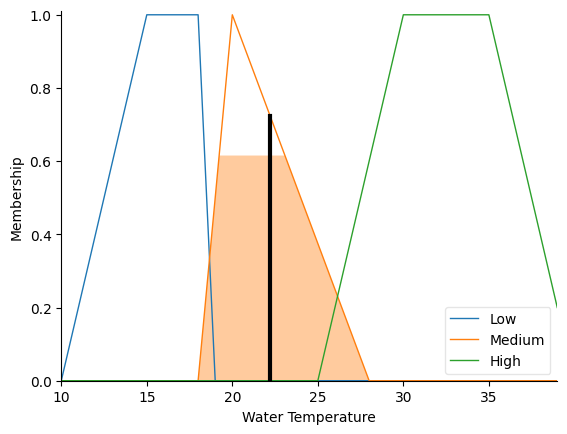

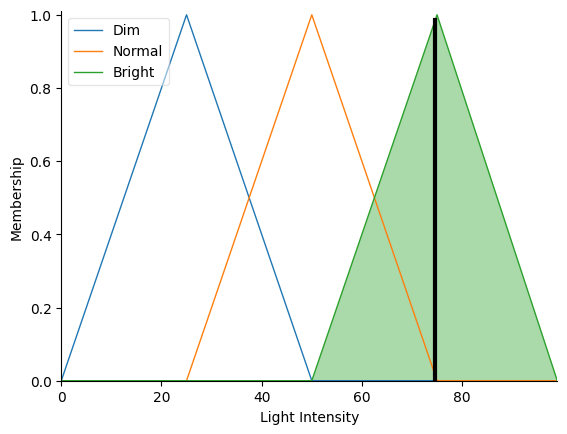

In [23]:
# Scenario 7: Cold Temperature, High Activity, Dark Light
# Expectation: AC Temperature - Medium, Water Temperature - Medium, Light Intensity - Bright
compute_output(temperature=5, activity=90, light_level=100)


Ac Temperature: 23.00
Water Temperature: 22.21
Light Intensity: 74.67


{'ac_temperature': np.float64(23.0),
 'water_temperature': np.float64(22.213675213675206),
 'light_intensity': np.float64(74.66666666666666)}

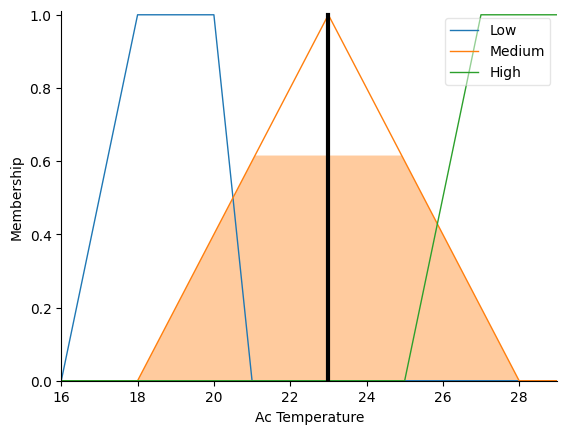

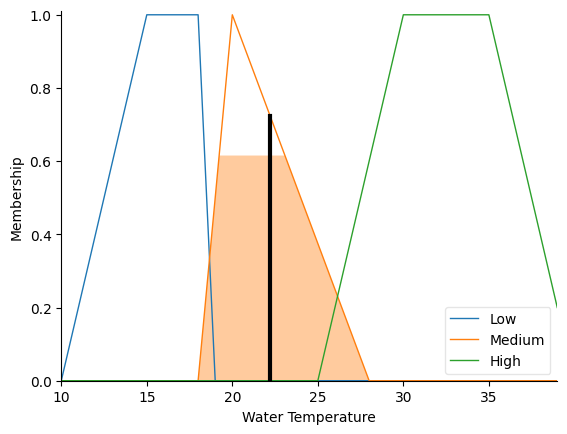

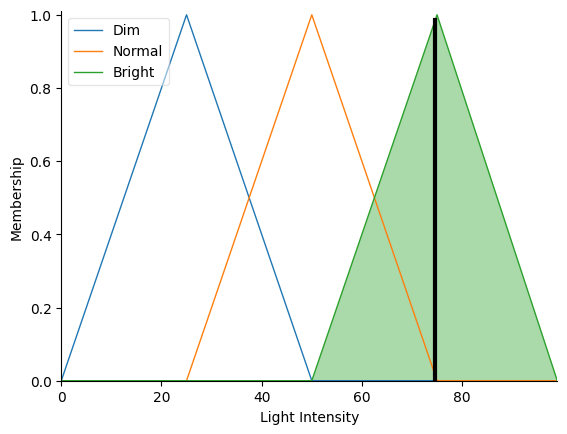

In [24]:
# Scenario 8: Cold Temperature, Moderate Activity, Dark Light
# Expectation: AC Temperature - Medium, Water Temperature - Medium, Light Intensity - Bright
compute_output(temperature=5, activity=50, light_level=100)


Ac Temperature: 27.29
Water Temperature: 32.41
Light Intensity: 25.00


{'ac_temperature': np.float64(27.28904428904429),
 'water_temperature': np.float64(32.40558144605239),
 'light_intensity': np.float64(24.999999999999996)}

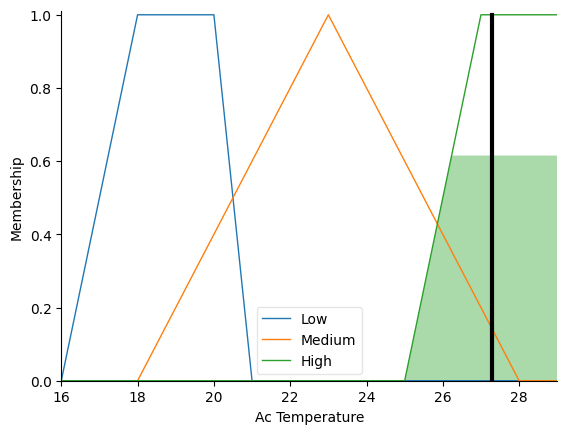

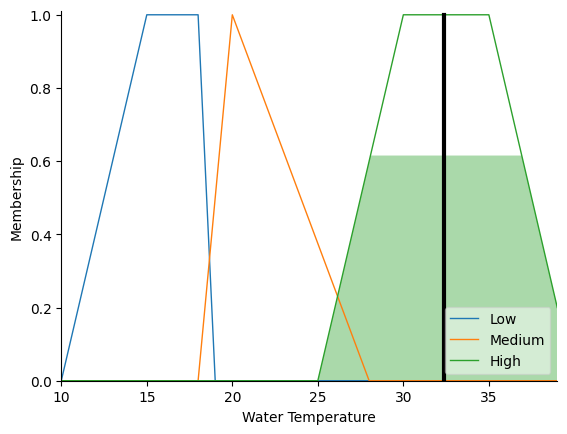

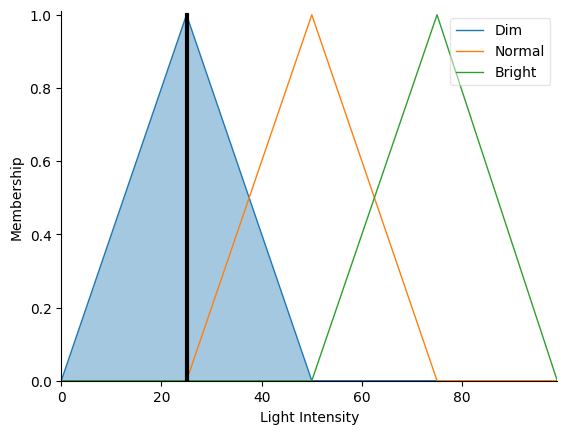

In [25]:
# Scenario 9: Cold Temperature, Low Activity, Dark Light
# Expectation: AC Temperature - High, Water Temperature - High, Light Intensity - Dim
compute_output(temperature=5, activity=10, light_level=100)

In [26]:
# Function to generate gene
def generate_gene(key, value):
    match key:
        case "ac_temperature":
            if value <= 20:
                return list(range(16, 20))
            elif value <= 25:
                return list(range(21, 25))
            else:
                return list(range(26, 30))
        case "light_intensity":
            if value <= 25:
                return list(range(0, 25))
            elif value <= 50:
                return list(range(25, 50))
            elif value <= 75:
                return list(range(50, 75))
            else:
                return list(range(75, 99))
        case "water_temperature":
            if value <= 15:
                return list(range(11, 15))
            elif value <= 20:
                return list(range(16, 20))
            elif value <= 25:
                return list(range(21, 25))
            elif value <= 30:
                return list(range(26, 30))
            elif value <= 35:
                return list(range(31, 35))
            else:
                return list(range(31, 40))

In [27]:
# Initialize Genes
POP_SIZE = 500
MUT_RATE = 0.1
CHROMO_LEN = 10
GENES_1 = generate_gene("ac_temperature", 18.71)  # Genes for Ac Temperature
GENES_2 = generate_gene("light_intensity", 74.67)  # Genes for Light Intensity
GENES_3 = generate_gene("water_temperature", 15.33)  # Genes for Water Temperature

In [28]:
# Initializes a population of chromosomes, where each chromosome is a tuple of three gene sets, randomly chosen for each individual.
def initialize_pop(chromo_len):
    population = []

    for _ in range(POP_SIZE):
        chromosome_1 = [random.choice(GENES_1) for _ in range(chromo_len)]
        chromosome_2 = [random.choice(GENES_2) for _ in range(chromo_len)]
        chromosome_3 = [random.choice(GENES_3) for _ in range(chromo_len)]
        population.append((chromosome_1, chromosome_2, chromosome_3))
    return population

In [29]:
# Function to calculate Fitness
#Calculates the fitness of a chromosome by summing the absolute differences between each gene and its optimal value for AC temperature, light intensity, and water temperature.

def fitness_cal(chromosome, optimal_ac_temperature, optimal_light_intensity, optimal_water_temperature):
    chromosome_1, chromosome_2, chromosome_3 = chromosome

    fitness_1 = sum(abs(gene - optimal_ac_temperature) for gene in chromosome_1)
    fitness_2 = sum(abs(gene - optimal_light_intensity) for gene in chromosome_2)
    fitness_3 = sum(abs(gene - optimal_water_temperature) for gene in chromosome_3)

    return fitness_1 + fitness_2 + fitness_3

In [30]:
# Selection Function
def selection(population, fitnesses):
    sorted_population = sorted(zip(population, fitnesses), key=lambda x: x[1])
    selected = [chromo for chromo, _ in sorted_population[:POP_SIZE // 2]]
    return selected

In [31]:
# Crossover Function
def crossover(parents, chromo_len):
    offspring = []
    for _ in range(POP_SIZE):
        parent1 = random.choice(parents)
        parent2 = random.choice(parents)
        crossover_point = random.randint(1, chromo_len - 1)
        child_1 = parent1[0][:crossover_point] + parent2[0][crossover_point:]
        child_2 = parent1[1][:crossover_point] + parent2[1][crossover_point:]
        child_3 = parent1[2][:crossover_point] + parent2[2][crossover_point:]
        offspring.append((child_1, child_2, child_3))
    return offspring

In [32]:
# Mutation Function
def mutate(offspring, mut_rate):
    mutated_offspring = []
    for chromosome in offspring:
        chromosome_1, chromosome_2, chromosome_3 = chromosome

        mutated_chromosome_1 = [
            random.choice(GENES_1) if random.random() < mut_rate else gene
            for gene in chromosome_1
        ]
        mutated_chromosome_2 = [
            random.choice(GENES_2) if random.random() < mut_rate else gene
            for gene in chromosome_2
        ]
        mutated_chromosome_3 = [
            random.choice(GENES_3) if random.random() < mut_rate else gene
            for gene in chromosome_3
        ]
        mutated_offspring.append((mutated_chromosome_1, mutated_chromosome_2, mutated_chromosome_3))
    return mutated_offspring

In [33]:
# Function to get optimal value
def get_optimal_value(key, value):
    match key:
        case "ac_temperature":
            if value < 20:
                return 16
            elif value < 25:
                return 20
            else:
                return 25
        case "light_intensity":
            if value <= 25:
                return 0
            elif value <= 35:
                return 20
            elif value <= 60:
                return 50
            else:
                return 90
        case "water_temperature":
            if value < 15:
                return 10
            elif value < 20:
                return 15
            elif value < 25:
                return 20
            elif value < 30:
                return 25
            else:
                return 35

In [34]:
# Genetic Algorithm function to optimize the FLC by evolving the population based on the fitness function
def genetic_algorithm(chromo_len, pop_size, mut_rate):
    population = initialize_pop(chromo_len)  # Initialize population
    generation = 1
    fitness_progression = []  # List to store the best fitness value for each generation

    # Set initial optimal values for ac_temperature, light_intensity, and water_temperature based on the first chromosome
    minimum_ac_temperature = np.min(population[0][0])
    minimum_light_intensity = np.min(population[0][1])
    minimum_water_temperature = np.min(population[0][2])

    # Get optimal values for the variables
    optimal_ac_temperature = get_optimal_value("ac_temperature", minimum_ac_temperature)
    optimal_light_intensity = get_optimal_value("light_intensity", minimum_light_intensity)
    optimal_water_temperature = get_optimal_value("water_temperature", minimum_water_temperature)

    # Evolve the population through generations until an optimal solution is found or a stopping criterion is met
    while generation < 500:
        fitnesses = [
            fitness_cal(chromo, optimal_ac_temperature, optimal_light_intensity, optimal_water_temperature)
            for chromo in population
        ]
        best_chromosome = population[fitnesses.index(min(fitnesses))]  # Select the best chromosome
        best_fitness = min(fitnesses)
        fitness_progression.append(best_fitness)  # Record the best fitness of the generation

        print(f"Generation {generation}: Best Chromosome = {best_chromosome}, Fitness = {best_fitness}")

        # Stop if an optimal solution is found or if the fitness is below a certain threshold
        if best_fitness == 0 or best_fitness / 100 < 0.25:
            print("Optimal power consumption pattern found!")
            break

        # Selection, crossover, and mutation to evolve the population
        parents = selection(population, fitnesses)
        offspring = crossover(parents, chromo_len)
        population = mutate(offspring, mut_rate)

        generation += 1

    # Output the optimal values for each parameter
    print("Optimal Ac Temperature = ", np.average(best_chromosome[0]))
    print("Optimal Light Intensity = ", np.average(best_chromosome[1]))
    print("Optimal Water Temperature = ", np.average(best_chromosome[2]))

    # Plot fitness progression
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(fitness_progression) + 1), fitness_progression, marker='o')
    plt.title("Fitness Value Progression Over Generations")
    plt.xlabel("Generation")
    plt.ylabel("Fitness Value")
    plt.grid()
    plt.show()

Required Ac Temperature 18.71
Required Light Intensity 25.0
Required Water Temperature 15.33
Generation 1: Best Chromosome = ([19, 17, 16, 18, 19, 18, 18, 18, 16, 17], [4, 13, 6, 1, 9, 0, 7, 4, 3, 3], [18, 16, 16, 16, 16, 17, 19, 17, 17, 19]), Fitness = 87
Generation 2: Best Chromosome = ([19, 16, 16, 16, 17, 19, 18, 17, 18, 16], [9, 0, 2, 3, 11, 0, 3, 6, 12, 0], [17, 16, 18, 19, 16, 17, 19, 16, 17, 16]), Fitness = 79
Generation 3: Best Chromosome = ([16, 17, 17, 16, 19, 16, 18, 17, 16, 18], [0, 10, 6, 1, 2, 7, 15, 10, 0, 0], [18, 19, 16, 16, 16, 16, 19, 16, 18, 18]), Fitness = 83
Generation 4: Best Chromosome = ([17, 16, 19, 18, 18, 17, 16, 16, 18, 16], [0, 0, 1, 2, 1, 12, 0, 8, 0, 0], [18, 19, 19, 18, 17, 18, 18, 16, 16, 17]), Fitness = 61
Generation 5: Best Chromosome = ([16, 18, 16, 16, 16, 17, 16, 18, 17, 19], [9, 2, 3, 1, 4, 6, 8, 2, 2, 2], [17, 18, 18, 16, 16, 19, 16, 18, 16, 17]), Fitness = 69
Generation 6: Best Chromosome = ([19, 16, 16, 16, 17, 17, 16, 16, 18, 18], [9, 0, 2, 

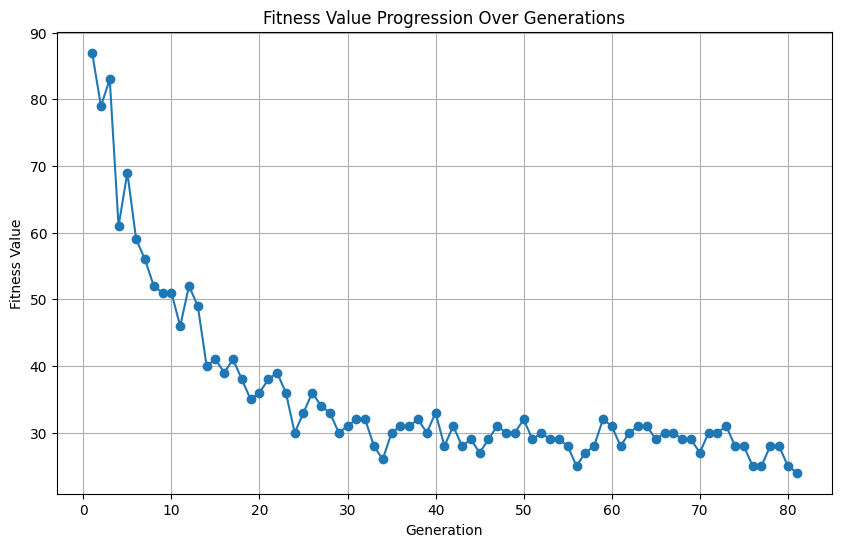

In [35]:
# Run the algorithm

# Set outputs of fuzzy logic controllers
FLC_OUTPUTS=[[18.71, 15.33, 25.00], [18.71,	15.33,	25.00], [23.00,	22.00,	25.00], [18.71, 15.33, 50.00], [23.00,	22.00,	50.00], [23.00,	22.00,	25.00], [23.00,	22.21,	74.67], [23.00,	22.21,	74.67] ,[27.29,	32.41,	25.00]]

ac_temperature = FLC_OUTPUTS[0][0]
water_temperature = FLC_OUTPUTS[0][1]
light_intensity = FLC_OUTPUTS[0][2]

GENES_1 = generate_gene("ac_temperature", ac_temperature)  # Genes for Ac Temperature
GENES_2 = generate_gene("light_intensity", light_intensity)  # Genes for Light Intensity
GENES_3 = generate_gene("water_temperature", water_temperature)  # Genes for Water Temperature

print('Required Ac Temperature', ac_temperature)
print('Required Light Intensity', light_intensity)
print('Required Water Temperature', water_temperature)

genetic_algorithm(CHROMO_LEN, POP_SIZE, MUT_RATE)

Required Ac Temperature 18.71
Required Light Intensity 15.33
Required Water Temperature 25.0
Generation 1: Best Chromosome = ([16, 17, 19, 19, 19, 17, 17, 17, 18, 18], [1, 9, 14, 0, 6, 3, 5, 8, 3, 4], [22, 24, 23, 21, 24, 23, 21, 23, 22, 24]), Fitness = 97
Generation 2: Best Chromosome = ([17, 17, 17, 16, 16, 16, 17, 17, 19, 18], [3, 1, 9, 1, 2, 8, 4, 2, 4, 2], [22, 23, 24, 22, 24, 23, 22, 24, 22, 22]), Fitness = 74
Generation 3: Best Chromosome = ([16, 18, 17, 17, 16, 18, 16, 17, 19, 17], [10, 5, 5, 6, 1, 2, 0, 0, 0, 7], [22, 24, 24, 23, 21, 22, 21, 21, 24, 24]), Fitness = 73
Generation 4: Best Chromosome = ([18, 17, 17, 19, 19, 19, 17, 16, 19, 17], [8, 0, 1, 7, 1, 8, 0, 0, 0, 7], [22, 23, 21, 22, 21, 21, 22, 21, 24, 22]), Fitness = 69
Generation 5: Best Chromosome = ([17, 19, 17, 16, 16, 19, 16, 19, 18, 17], [0, 4, 7, 2, 4, 3, 4, 0, 4, 0], [21, 21, 23, 24, 22, 22, 22, 21, 24, 22]), Fitness = 64
Generation 6: Best Chromosome = ([16, 16, 17, 18, 16, 18, 17, 18, 16, 17], [1, 7, 4, 0, 7,

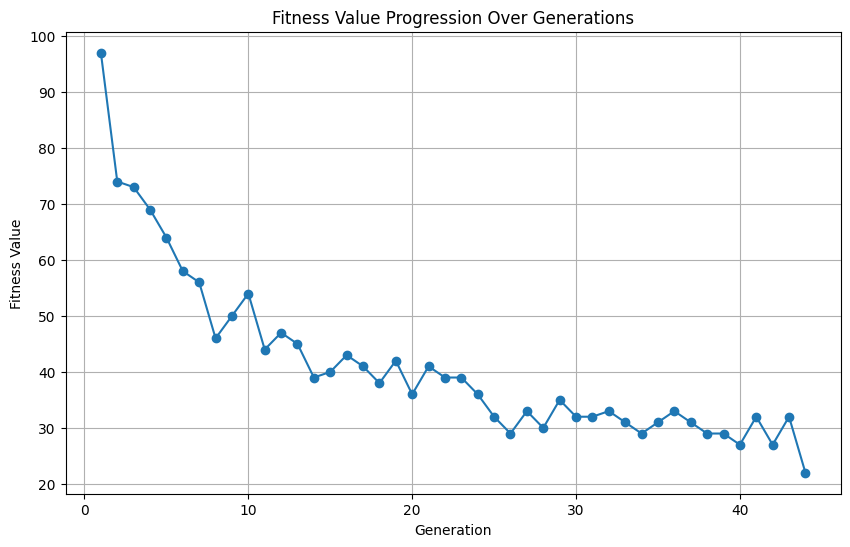

In [36]:
ac_temperature = FLC_OUTPUTS[1][0]
light_intensity = FLC_OUTPUTS[1][1]
water_temperature = FLC_OUTPUTS[1][2]

GENES_1 = generate_gene("ac_temperature", ac_temperature)  # Genes for Ac Temperature
GENES_2 = generate_gene("light_intensity", light_intensity)  # Genes for Light Intensity
GENES_3 = generate_gene("water_temperature", water_temperature)  # Genes for Water Temperature

print('Required Ac Temperature', ac_temperature)
print('Required Light Intensity', light_intensity)
print('Required Water Temperature', water_temperature)

genetic_algorithm(CHROMO_LEN, POP_SIZE, MUT_RATE)

Required Ac Temperature 23.0
Required Light Intensity 25.0
Required Water Temperature 22.0
Generation 1: Best Chromosome = ([21, 22, 22, 24, 21, 23, 24, 23, 22, 24], [0, 1, 5, 15, 3, 7, 3, 1, 5, 6], [24, 21, 23, 23, 22, 21, 23, 24, 24, 21]), Fitness = 98
Generation 2: Best Chromosome = ([23, 22, 21, 23, 21, 24, 23, 24, 23, 23], [2, 1, 5, 4, 9, 2, 0, 6, 2, 0], [21, 24, 24, 23, 21, 21, 23, 21, 22, 23]), Fitness = 81
Generation 3: Best Chromosome = ([23, 21, 21, 24, 21, 21, 21, 22, 24, 22], [12, 2, 4, 7, 4, 5, 8, 3, 1, 4], [21, 23, 21, 22, 24, 24, 21, 21, 23, 22]), Fitness = 92
Generation 4: Best Chromosome = ([23, 22, 21, 21, 23, 21, 24, 24, 21, 21], [8, 0, 5, 2, 5, 0, 0, 5, 0, 2], [23, 21, 22, 23, 22, 23, 21, 24, 23, 23]), Fitness = 73
Generation 5: Best Chromosome = ([22, 21, 21, 23, 22, 22, 21, 22, 22, 21], [2, 0, 8, 3, 3, 0, 0, 6, 8, 3], [21, 21, 21, 22, 23, 23, 24, 22, 24, 24]), Fitness = 75
Generation 6: Best Chromosome = ([22, 21, 21, 23, 22, 22, 21, 22, 21, 21], [2, 0, 8, 2, 3, 0

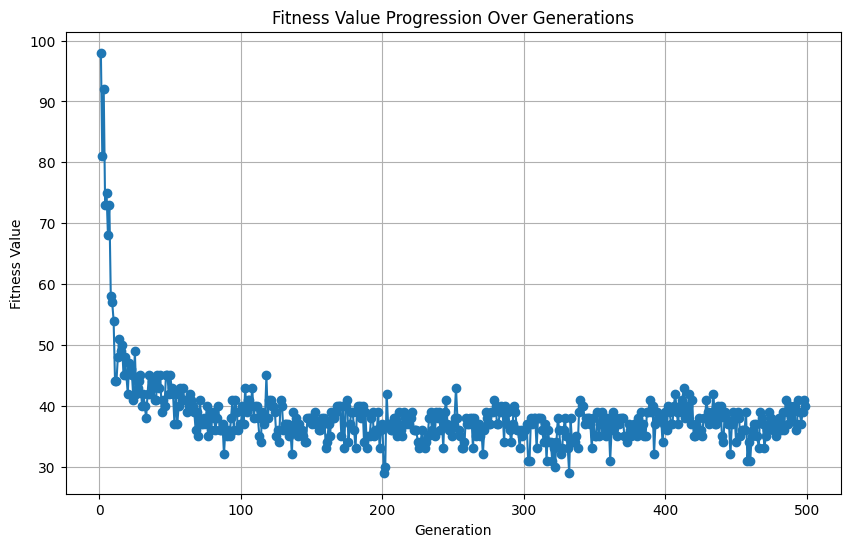

In [37]:
ac_temperature = FLC_OUTPUTS[2][0]
water_temperature = FLC_OUTPUTS[2][1]
light_intensity = FLC_OUTPUTS[2][2]

GENES_1 = generate_gene("ac_temperature", ac_temperature)  # Genes for Ac Temperature
GENES_2 = generate_gene("light_intensity", light_intensity)  # Genes for Light Intensity
GENES_3 = generate_gene("water_temperature", water_temperature)  # Genes for Water Temperature

print('Required Ac Temperature', ac_temperature)
print('Required Light Intensity', light_intensity)
print('Required Water Temperature', water_temperature)

genetic_algorithm(CHROMO_LEN, POP_SIZE, MUT_RATE)

Required Ac Temperature 18.71
Required Light Intensity 50.0
Required Water Temperature 15.33
Generation 1: Best Chromosome = ([19, 18, 18, 16, 19, 16, 18, 17, 19, 19], [38, 33, 29, 28, 25, 31, 31, 25, 27, 31], [18, 17, 17, 19, 19, 18, 17, 17, 18, 16]), Fitness = 143
Generation 2: Best Chromosome = ([16, 19, 19, 17, 19, 16, 16, 16, 19, 16], [34, 30, 27, 28, 28, 26, 29, 48, 28, 29], [19, 17, 16, 16, 19, 17, 18, 17, 16, 17]), Fitness = 142
Generation 3: Best Chromosome = ([16, 16, 19, 16, 17, 16, 16, 18, 16, 16], [25, 29, 33, 33, 27, 26, 32, 31, 29, 35], [17, 18, 16, 16, 19, 16, 18, 16, 18, 16]), Fitness = 126
Generation 4: Best Chromosome = ([16, 17, 17, 16, 18, 16, 17, 16, 18, 16], [26, 26, 26, 29, 29, 40, 40, 27, 26, 29], [17, 17, 19, 16, 19, 16, 16, 18, 16, 18]), Fitness = 127
Generation 5: Best Chromosome = ([19, 16, 18, 16, 17, 18, 19, 16, 19, 16], [28, 25, 28, 25, 26, 26, 40, 29, 26, 32], [16, 19, 16, 16, 17, 16, 17, 19, 17, 16]), Fitness = 118
Generation 6: Best Chromosome = ([18,

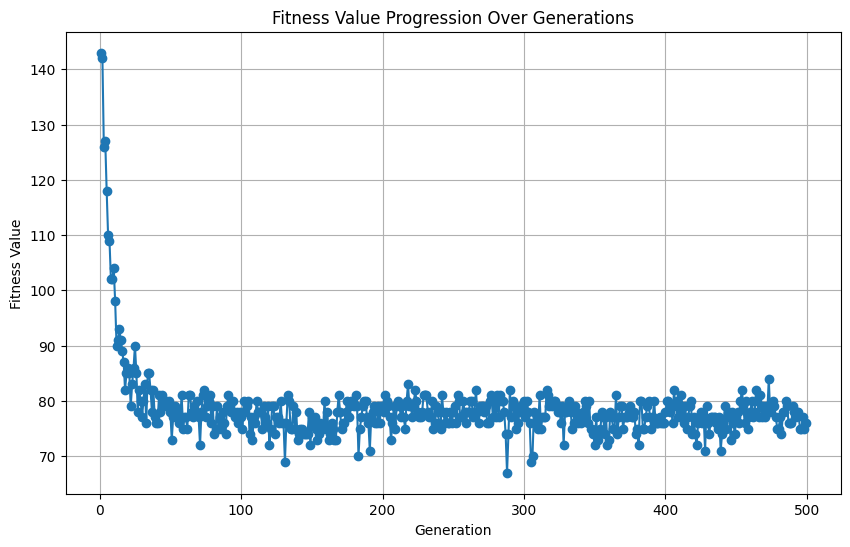

In [38]:
ac_temperature = FLC_OUTPUTS[3][0]
water_temperature = FLC_OUTPUTS[3][1]
light_intensity = FLC_OUTPUTS[3][2]


GENES_1 = generate_gene("ac_temperature", ac_temperature)  # Genes for Ac Temperature
GENES_2 = generate_gene("light_intensity", light_intensity)  # Genes for Light Intensity
GENES_3 = generate_gene("water_temperature", water_temperature)  # Genes for Water Temperature

print('Required Ac Temperature', ac_temperature)
print('Required Light Intensity', light_intensity)
print('Required Water Temperature', water_temperature)

genetic_algorithm(CHROMO_LEN, POP_SIZE, MUT_RATE)

Required Ac Temperature 23.0
Required Light Intensity 50.0
Required Water Temperature 22.0
Generation 1: Best Chromosome = ([23, 21, 22, 24, 21, 22, 22, 21, 22, 21], [27, 38, 26, 32, 25, 28, 39, 42, 28, 28], [23, 21, 22, 24, 24, 22, 22, 21, 24, 21]), Fitness = 156
Generation 2: Best Chromosome = ([21, 23, 24, 24, 21, 23, 21, 21, 23, 23], [32, 26, 33, 26, 38, 26, 26, 27, 48, 25], [23, 21, 23, 21, 23, 23, 22, 21, 22, 22]), Fitness = 152
Generation 3: Best Chromosome = ([22, 23, 23, 22, 21, 21, 22, 23, 21, 24], [28, 28, 33, 32, 30, 32, 26, 30, 28, 26], [24, 21, 22, 23, 21, 23, 22, 22, 24, 21]), Fitness = 138
Generation 4: Best Chromosome = ([21, 21, 21, 22, 24, 22, 24, 21, 23, 21], [28, 26, 30, 32, 25, 26, 30, 26, 37, 28], [23, 23, 22, 21, 22, 21, 22, 24, 21, 21]), Fitness = 128
Generation 5: Best Chromosome = ([22, 23, 24, 23, 22, 23, 21, 24, 21, 23], [26, 29, 25, 33, 38, 26, 26, 27, 25, 25], [22, 22, 23, 21, 23, 23, 22, 21, 22, 22]), Fitness = 127
Generation 6: Best Chromosome = ([21, 2

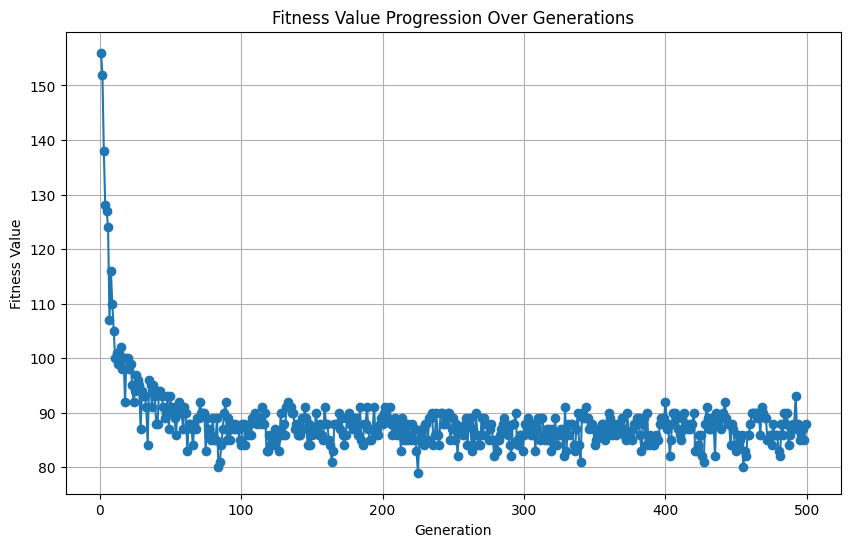

In [39]:
ac_temperature = FLC_OUTPUTS[4][0]
water_temperature = FLC_OUTPUTS[4][1]
light_intensity = FLC_OUTPUTS[4][2]


GENES_1 = generate_gene("ac_temperature", ac_temperature)  # Genes for Ac Temperature
GENES_2 = generate_gene("light_intensity", light_intensity)  # Genes for Light Intensity
GENES_3 = generate_gene("water_temperature", water_temperature)  # Genes for Water Temperature

print('Required Ac Temperature', ac_temperature)
print('Required Light Intensity', light_intensity)
print('Required Water Temperature', water_temperature)

genetic_algorithm(CHROMO_LEN, POP_SIZE, MUT_RATE)

Required Ac Temperature 23.0
Required Light Intensity 25.0
Required Water Temperature 22.0
Generation 1: Best Chromosome = ([21, 22, 21, 21, 22, 21, 23, 22, 21, 22], [8, 0, 12, 3, 19, 8, 0, 9, 3, 7], [24, 22, 21, 21, 21, 24, 23, 23, 22, 21]), Fitness = 107
Generation 2: Best Chromosome = ([21, 22, 21, 21, 22, 23, 22, 23, 23, 21], [8, 0, 12, 1, 19, 1, 6, 0, 12, 0], [24, 22, 21, 21, 22, 21, 21, 21, 23, 22]), Fitness = 96
Generation 3: Best Chromosome = ([21, 21, 23, 22, 23, 21, 22, 21, 23, 21], [7, 3, 3, 1, 7, 4, 4, 4, 4, 1], [23, 23, 21, 21, 22, 23, 24, 24, 22, 22]), Fitness = 81
Generation 4: Best Chromosome = ([23, 24, 23, 21, 21, 24, 23, 23, 21, 24], [4, 2, 0, 5, 4, 0, 5, 6, 2, 0], [24, 22, 23, 21, 22, 22, 22, 24, 21, 22]), Fitness = 78
Generation 5: Best Chromosome = ([21, 21, 21, 21, 21, 23, 22, 22, 23, 22], [7, 4, 1, 4, 2, 0, 6, 1, 3, 7], [21, 21, 24, 21, 23, 21, 22, 22, 22, 21]), Fitness = 70
Generation 6: Best Chromosome = ([22, 21, 21, 21, 21, 23, 22, 22, 23, 22], [2, 4, 1, 4, 

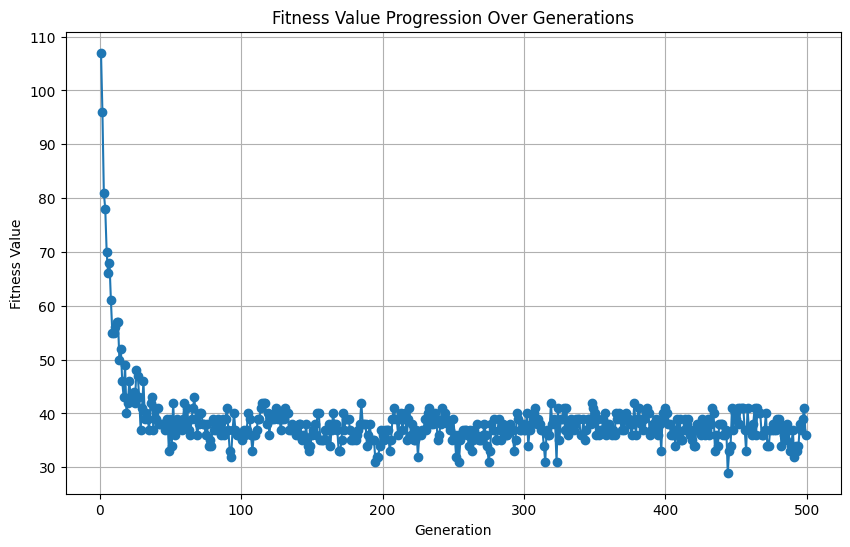

In [40]:
ac_temperature = FLC_OUTPUTS[5][0]
water_temperature = FLC_OUTPUTS[5][1]
light_intensity = FLC_OUTPUTS[5][2]


GENES_1 = generate_gene("ac_temperature", ac_temperature)  # Genes for Ac Temperature
GENES_2 = generate_gene("light_intensity", light_intensity)  # Genes for Light Intensity
GENES_3 = generate_gene("water_temperature", water_temperature)  # Genes for Water Temperature

print('Required Ac Temperature', ac_temperature)
print('Required Light Intensity', light_intensity)
print('Required Water Temperature', water_temperature)

genetic_algorithm(CHROMO_LEN, POP_SIZE, MUT_RATE)

Required Ac Temperature 23.0
Required Light Intensity 74.67
Required Water Temperature 22.21
Generation 1: Best Chromosome = ([21, 24, 22, 23, 21, 24, 23, 22, 22, 22], [54, 51, 57, 60, 67, 53, 54, 51, 58, 53], [22, 22, 21, 21, 21, 22, 21, 22, 22, 23]), Fitness = 99
Generation 2: Best Chromosome = ([22, 21, 22, 22, 22, 21, 22, 22, 22, 22], [51, 53, 54, 50, 52, 59, 50, 71, 53, 51], [22, 24, 21, 23, 24, 23, 23, 21, 23, 22]), Fitness = 88
Generation 3: Best Chromosome = ([21, 21, 21, 22, 24, 22, 22, 23, 21, 23], [57, 52, 50, 50, 66, 51, 54, 53, 55, 63], [22, 22, 21, 23, 21, 21, 21, 24, 23, 22]), Fitness = 91
Generation 4: Best Chromosome = ([23, 21, 23, 23, 21, 24, 22, 21, 21, 21], [55, 50, 56, 55, 51, 60, 56, 55, 51, 53], [21, 23, 21, 22, 23, 21, 21, 24, 24, 23]), Fitness = 85
Generation 5: Best Chromosome = ([23, 21, 21, 22, 21, 23, 22, 21, 21, 21], [52, 52, 55, 57, 50, 54, 51, 65, 53, 51], [21, 22, 23, 21, 22, 24, 22, 22, 24, 22]), Fitness = 79
Generation 6: Best Chromosome = ([23, 21, 

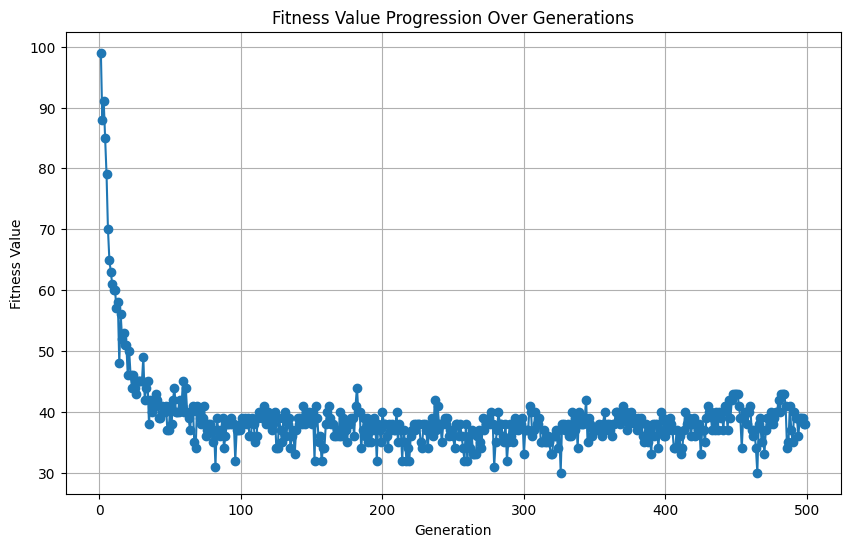

In [41]:
ac_temperature = FLC_OUTPUTS[6][0]
water_temperature = FLC_OUTPUTS[6][1]
light_intensity = FLC_OUTPUTS[6][2]

GENES_1 = generate_gene("ac_temperature", ac_temperature)  # Genes for Ac Temperature
GENES_2 = generate_gene("light_intensity", light_intensity)  # Genes for Light Intensity
GENES_3 = generate_gene("water_temperature", water_temperature)  # Genes for Water Temperature

print('Required Ac Temperature', ac_temperature)
print('Required Light Intensity', light_intensity)
print('Required Water Temperature', water_temperature)

genetic_algorithm(CHROMO_LEN, POP_SIZE, MUT_RATE)

Required Ac Temperature 23.0
Required Light Intensity 74.67
Required Water Temperature 22.21
Generation 1: Best Chromosome = ([24, 21, 21, 21, 21, 22, 21, 21, 22, 22], [52, 64, 57, 63, 51, 50, 55, 66, 51, 63], [22, 22, 24, 21, 21, 23, 21, 23, 22, 23]), Fitness = 110
Generation 2: Best Chromosome = ([24, 21, 24, 24, 22, 22, 21, 22, 23, 24], [50, 50, 54, 55, 50, 50, 53, 57, 62, 62], [22, 21, 22, 21, 21, 24, 24, 23, 21, 24]), Fitness = 93
Generation 3: Best Chromosome = ([21, 24, 22, 24, 21, 23, 21, 21, 23, 23], [54, 51, 54, 56, 50, 55, 56, 55, 60, 58], [21, 21, 24, 24, 22, 23, 22, 21, 21, 23]), Fitness = 94
Generation 4: Best Chromosome = ([22, 23, 24, 21, 23, 23, 24, 24, 21, 24], [53, 52, 52, 64, 50, 61, 50, 63, 50, 51], [21, 22, 21, 21, 22, 21, 22, 21, 22, 22]), Fitness = 90
Generation 5: Best Chromosome = ([21, 21, 23, 22, 22, 24, 22, 22, 22, 23], [50, 53, 56, 64, 51, 57, 57, 52, 50, 52], [23, 21, 21, 22, 23, 21, 21, 22, 23, 22]), Fitness = 83
Generation 6: Best Chromosome = ([21, 21,

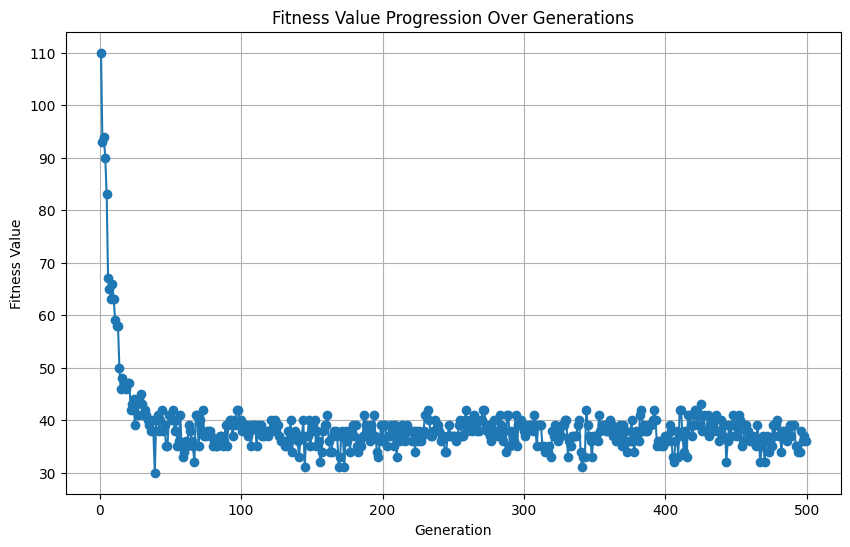

In [42]:
ac_temperature = FLC_OUTPUTS[7][0]
water_temperature = FLC_OUTPUTS[7][1]
light_intensity = FLC_OUTPUTS[7][2]


GENES_1 = generate_gene("ac_temperature", ac_temperature)  # Genes for Ac Temperature
GENES_2 = generate_gene("light_intensity", light_intensity)  # Genes for Light Intensity
GENES_3 = generate_gene("water_temperature", water_temperature)  # Genes for Water Temperature

print('Required Ac Temperature', ac_temperature)
print('Required Light Intensity', light_intensity)
print('Required Water Temperature', water_temperature)

genetic_algorithm(CHROMO_LEN, POP_SIZE, MUT_RATE)

Required Ac Temperature 27.29
Required Light Intensity 25.0
Required Water Temperature 32.41
Generation 1: Best Chromosome = ([26, 26, 29, 28, 26, 29, 28, 26, 26, 29], [12, 0, 2, 6, 13, 2, 0, 12, 10, 1], [34, 32, 34, 32, 33, 34, 33, 34, 34, 33]), Fitness = 98
Generation 2: Best Chromosome = ([29, 27, 28, 27, 29, 26, 27, 26, 29, 27], [4, 0, 15, 11, 2, 4, 10, 4, 0, 0], [33, 34, 32, 32, 34, 33, 34, 31, 31, 32]), Fitness = 99
Generation 3: Best Chromosome = ([28, 28, 26, 29, 26, 26, 29, 29, 26, 26], [5, 6, 0, 0, 6, 9, 3, 2, 3, 1], [31, 31, 32, 34, 32, 32, 33, 32, 33, 34]), Fitness = 84
Generation 4: Best Chromosome = ([26, 26, 26, 29, 29, 29, 28, 26, 29, 27], [2, 7, 4, 3, 3, 2, 5, 2, 4, 6], [34, 33, 31, 32, 33, 34, 34, 34, 34, 33]), Fitness = 81
Generation 5: Best Chromosome = ([28, 27, 26, 28, 29, 26, 27, 26, 28, 26], [0, 9, 1, 4, 1, 5, 5, 0, 3, 2], [31, 34, 33, 32, 34, 31, 34, 33, 33, 34]), Fitness = 72
Generation 6: Best Chromosome = ([26, 29, 29, 28, 27, 28, 26, 27, 29, 27], [6, 0, 8, 

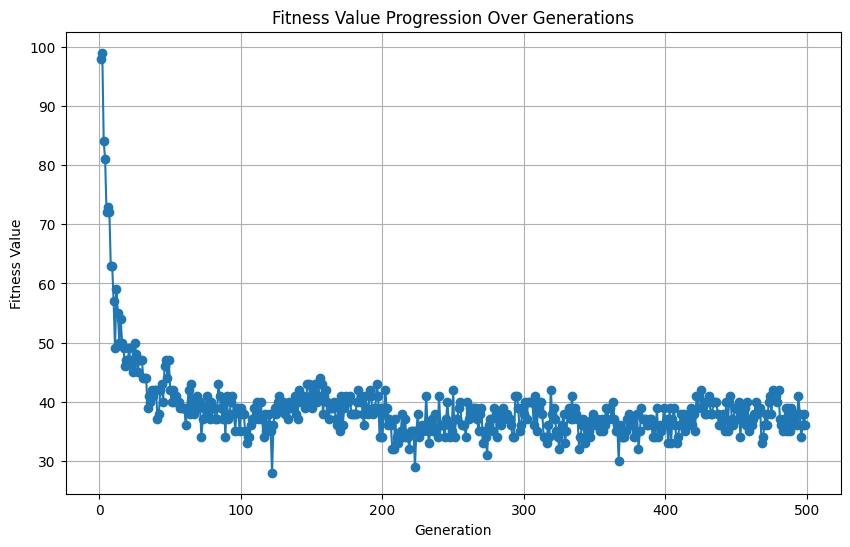

In [43]:
ac_temperature = FLC_OUTPUTS[8][0]
water_temperature = FLC_OUTPUTS[8][1]
light_intensity = FLC_OUTPUTS[8][2]


GENES_1 = generate_gene("ac_temperature", ac_temperature)  # Genes for Ac Temperature
GENES_2 = generate_gene("light_intensity", light_intensity)  # Genes for Light Intensity
GENES_3 = generate_gene("water_temperature", water_temperature)  # Genes for Water Temperature

print('Required Ac Temperature', ac_temperature)
print('Required Light Intensity', light_intensity)
print('Required Water Temperature', water_temperature)

genetic_algorithm(CHROMO_LEN, POP_SIZE, MUT_RATE)